<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/7_14_TensorFlow_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

mnist.load_data()
(x_train, y_train), (x_test, y_test)= mnist.load_data()

#資料集本身為矩陣 並已分為train test
print(x_train)
print(y_train)
print(x_test)
print(y_test)

In [ ]:
import pandas as pd
# 0:black 1:white
pd.DataFrame(x_train[0])

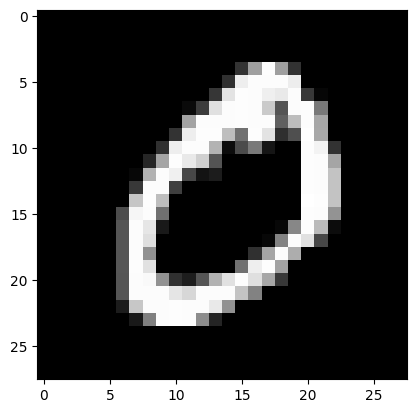

In [ ]:
import matplotlib.pyplot as plt

#劃出圖
plt.imshow(x_train[1], cmap="gray")

In [ ]:
import numpy as np

# 攤平操作  -1代表由系統幫你算
x_train_1d = x_train.reshape(-1,784)
x_test_1d = x_test.reshape(-1,784)

# 6萬筆 train 1萬筆 test
print(x_train_1d.shape)
print(x_test_1d.shape)

(60000, 784)
(10000, 784)


In [ ]:
#建模 先選擇模型 再設定隱藏層
# Model Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layer=[
    # 輸入層
    Dense(128, activation="relu", input_dim=784),
    # 輸出層
    Dense(10, activation="softmax")
]

model= Sequential(layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# cross entropy 在遠處的斜率比較大

In [ ]:
# 確立目標及求解方法：
# 以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)
# 輸出一個: 0.6 (0.6,0.4) binarycrossentropy p1 log(1/0.6) + p2 log(1/0.4)
# 輸出10個: CategoricalCrossentropy sigma pi log1/qi
from  tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss="CategoricalCrossentropy",
       optimizer='adam',
       metrics=["accuracy"])

In [ ]:
# 消除bias 共有輸出層10個 每個都有自己的答案 要把大家都放在0的起跑點上
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 將數據進行類別轉換 (資料類別為1,2,3,4,5,6,7,8,9,0)
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

連鎖法則 : 全部微分 = 每一段微分的相乘

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 看訓練的loss是沒用的 因為他只會越來越低(考試看答案背答案) 要看validation(沒看過的資料 再考一次試)
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True) # patience 5次沒有變更好 就停止
]
# validation 驗證資料
# batch 批量樣本 (每次選200樣本跑)
# epoch 將整個數據集疊代一次 (共30次)

model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=30,
     validation_split=0.1,
     callbacks=c)

Epoch 1/30
270/270 [==============================] - 3s 11ms/step - loss: 0.0029 - accuracy: 0.9839 - val_loss: 0.0038 - val_accuracy: 0.9760
Epoch 2/30
270/270 [==============================] - 2s 8ms/step - loss: 0.0026 - accuracy: 0.9860 - val_loss: 0.0035 - val_accuracy: 0.9765
Epoch 3/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0023 - accuracy: 0.9878 - val_loss: 0.0033 - val_accuracy: 0.9775
Epoch 4/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0020 - accuracy: 0.9892 - val_loss: 0.0033 - val_accuracy: 0.9780
Epoch 5/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0018 - accuracy: 0.9907 - val_loss: 0.0033 - val_accuracy: 0.9793
Epoch 6/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0016 - accuracy: 0.9920 - val_loss: 0.0032 - val_accuracy: 0.9797
Epoch 7/30
270/270 [==============================] - 3s 10ms/step - loss: 0.0015 - accuracy: 0.9924 - val_loss: 0.0031 - val_accuracy: 0.9793
Epoc

In [ ]:
# sigmoid 函數
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9764
# [0.004473123233765364, 0.9764000177383423]

# softmax 函數
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9754
# [0.0037451598327606916, 0.9753999710083008]

# 加了optimizer以後
# 313/313 [==============================] - 1s 1ms/step - loss: 0.0037 - accuracy: 0.9765
# [0.003731722943484783, 0.9764999747276306]

# 再跑180次以後
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9791
# [0.0035477527417242527, 0.9790999889373779]

model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9776


[0.0034377221018075943, 0.9775999784469604]

In [ ]:
model.predict(x_test_1d_norm)

313/313 [==============================] - 1s 2ms/step


array([[1.0666756e-07, 4.6235819e-08, 1.8697492e-05, ..., 9.9948710e-01,
        1.3043583e-05, 2.1070347e-05],
       [2.0698849e-06, 8.4265351e-04, 9.9687487e-01, ..., 1.3088606e-12,
        1.4934139e-04, 2.2468301e-08],
       [1.7436365e-05, 9.8830676e-01, 9.8923035e-04, ..., 2.4795241e-03,
        2.4049177e-03, 7.0650931e-06],
       ...,
       [4.0744386e-10, 7.9549667e-10, 2.6790004e-11, ..., 9.7557904e-06,
        8.9303821e-06, 5.8935639e-05],
       [4.9023782e-08, 1.2295785e-08, 2.0955957e-09, ..., 7.2786226e-09,
        6.2072638e-04, 4.9271309e-10],
       [3.3471636e-07, 6.4792697e-15, 6.8115503e-07, ..., 5.3085212e-14,
        2.1657665e-09, 8.4104061e-12]], dtype=float32)

In [ ]:
pre= model.predict(x_test_1d_norm).argmax(axis=-1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# demo
n=np.array([[1,2],
      [3,4],
      [6,5]]
           )
# axis=1 返回每列最大值索引
print(n.argmax(axis=1))
# axis=0 返回每行最大值索引
print(n.argmax(axis=0))

# 從最後一個維度中 選出最大值的索引
print(n.argmax(axis=-1))
# 參數不出現時 將陣列平舖
print(n.argmax())

[1 1 0]
[2 2]
[1 1 0]
4


In [ ]:
# demo
#判斷陣列中那些位置的值不為0

n=np.array([[5,4],
      [0,6]])

np.nonzero(n)
# 回傳兩組tuple
#第一組告訴你哪幾列有非0值
#第二組告訴你每一列的第幾個位置非0值

(array([0, 0, 1]), array([0, 1, 1]))

In [ ]:
# demo 2
a= np.array([[0,0,3],[0,0,0],[9,0,0]])
b= np.array([[0,0,4],[1,0,0],[3,6,0]])
print(a!=b)
# true==0
np.nonzero(a)
# (array([0, 2]), array([2, 0]))
#  x座標         y 座標
# 共兩個不為0的值得位置
np.nonzero(b)

[[False False  True]
 [ True False False]
 [ True  True False]]


(array([0, 1, 2, 2]), array([2, 0, 0, 1]))

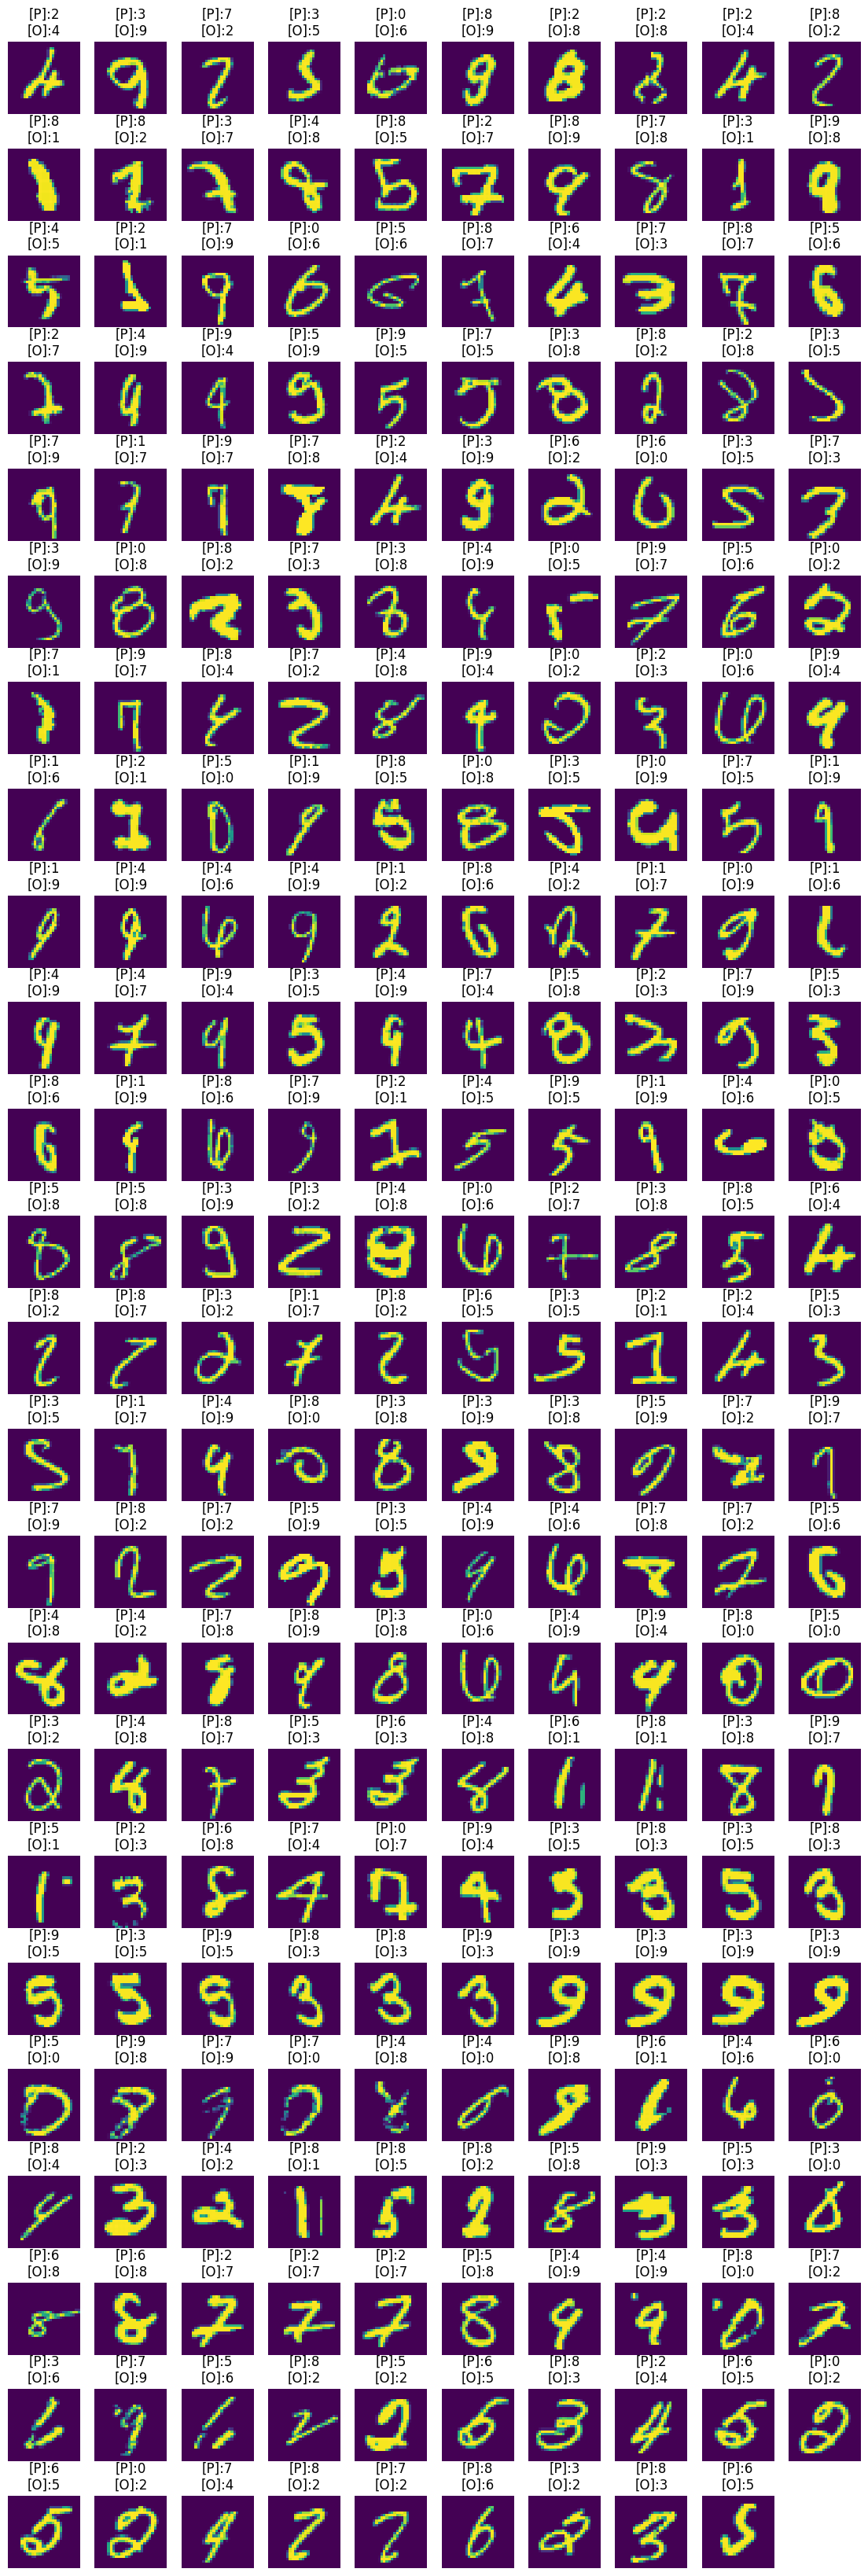

In [ ]:
# 比對那些資料式比對錯誤的
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
width = 10
height= len(idx) // 10 + 1
# Width, height in inches
plt.figure(figsize=(14, 42))
for i in range(len(idx)):
    # plt(總高,總寬,第幾張)
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(false_pre[i],
                   false_true[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])